In [ ]:
#TO DO
#1 - change 'MP' so that the boxplot understands the value...XX:XX isnt a valid float
#2 - add boxplot label and title and other graph properties
#3 - automatically loop through and populate the players web-scrap and data-frame creation
#4 - different boxplots

#optional
#5 - 4-d scatter plot....feature1,feature2,feature3 = [x,y,z] and have W-L as color
#6 - logistic regression

In [137]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#working with sql database and sql queries inside python
from sqlalchemy import create_engine
#needed to convert unicode to numeric
import unicodedata

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [138]:
lov = 'http://www.basketball-reference.com/players/l/loveke01/gamelog/2015/'
kyr = 'http://www.basketball-reference.com/players/i/irvinky01/gamelog/2015/'
leb = 'http://www.basketball-reference.com/players/j/jamesle01/gamelog/2015/'

In [139]:
player_string_key = leb

req = requests.get(player_string_key)

text = BeautifulSoup(req.text, "html.parser")

stats = text.find('table', {'id': 'pgl_basic'})

#print stats

In [140]:
# find the schema
cols = [i.get_text() for i in stats.thead.find_all('th')]  

# convert from unicode to string
cols = [x.encode('UTF8') for x in cols]                    

#these are schema with empty string names
cols[5]='something'
cols[7]='something2'

# get rows
rows = [i.get_text().split('\n') for i in stats.tbody.find_all('tr')] 

# convert rows to strings
for i in rows:
    rows[0] = [x.encode('UTF8') for x in i]                          

    
rows=rows[1:-1]


short = []

for i in range(len(rows)):
    if len(rows[i]) < 31:
        short.append(i)
        
new_rows = []

for i in range(len(rows)):
    if i in short:
        continue
    else:
        new_rows.append(rows[i])

l = range(len(new_rows))

######
#change df name - lebron, love, etc....needs to part of automation
######
lebron = pd.DataFrame(columns=cols, index = l)    # create dataframe with schema

for i in l:
    try:
        # the split function was adding an empty string to the front and end of each row, needed to be removed
        new_rows[i]=new_rows[i][1:-1]  
    except ValueError:
        continue
for i in l:
    try:
        lebron.loc[i]=new_rows[i]
    except ValueError:
        continue
        

In [141]:
#clean up data
#remove rows that contain the schema names
#example
#print love.head(25)

#SQL 
#Create your connection
#Just need to do this once with the database
engine = create_engine('sqlite:///:memory:')

#create tables in the database...probably better to keep the same name in pandas and SQL
love.to_sql('love', engine)
lebron.to_sql('lebron',engine)

#left join
lebron_love = pd.read_sql_query('SELECT * FROM lebron \
    JOIN love ON lebron.Date = love.Date',engine)

#print 'length of lebron.columns'
#print len(lebron.columns)

#remove columns with duplicated names
lebron.drop_duplicates = lebron

#print 'length of lebron.columns'
#print len(lebron.columns)


In [142]:
lebron.head()

,Rk,G,Date,Age,Tm,something,Opp,something2,GS,MP,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,DFS
0,2,2,2014-10-31,29-305,CLE,@,CHI,W (+6),1,41:40,...,8,5,4,1,3,1,36,27.4,-3,62.5
1,3,3,2014-11-04,29-309,CLE,@,POR,L (-19),1,34:56,...,7,7,1,0,3,2,11,8.8,-15,31.8
2,4,4,2014-11-05,29-310,CLE,@,UTA,L (-2),1,42:02,...,3,4,3,0,4,2,31,23.5,+1,46.3
3,5,5,2014-11-07,29-312,CLE,@,DEN,W (+9),1,39:38,...,7,11,1,1,3,1,22,20.3,+12,51.8
4,6,6,2014-11-10,29-315,CLE,,NOP,W (+7),1,40:26,...,11,9,1,1,4,1,32,29.8,+16,63.3


In [143]:
#clean up data - cant plot non-numeric strings...every 20 rows the schema repeats

print 'pre-clean up'
print lebron.shape

#since the entire schema is replicated every N rows, we can just check one of the columns for the match
validRow_boolVector = lebron['Rk'] != 'Rk'

#use the boolean vector as a mask for only keeping True values
lebron = lebron[validRow_boolVector]

print 'post-clean up'
print lebron.shape

pre-clean up
(72, 31)
post-clean up
(68, 31)


In [144]:
#2015-06-23
#Jason - head function returns a formatted string about to make it "pretty"
#saveHead = blah.head() isnt a good idea, as the head function is more for display, and not saving original data
#unicodedata.numeric(lebron.FG[:,])

#This will overwrite the dataframe itself with the converted object types....AVOID!
#lebron = lebron.convert_objects(convert_numeric=True).dtypes

#Convert "objects" in the dataframe to numeric, float, etc
lebron = lebron.convert_objects(convert_numeric=True)

#test that these columns are numeric
#print lebron.FG[0] + 1

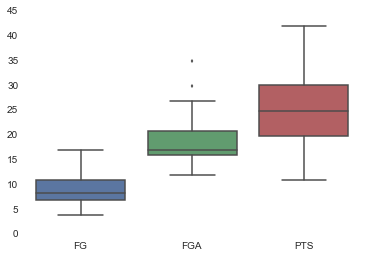

In [130]:
#visualization

#'MP' needs to be converted to a number
#df = pd.DataFrame(df, columns=['FG', 'FGA', 'PTS','MP'])

lebron_boxPlotObject = pd.DataFrame(lebron, columns=['FG', 'FGA', 'PTS'])

sns.boxplot(df)